# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

Arquivos no diretório '/content': ['.config', 'X_train_selected.csv', '__MACOSX', 'X_test_selected.csv', 'UCI HAR Dataset', 'UCI HAR Dataset.zip', 'sample_data']
Bases carregadas e salvas com sucesso!
Matriz de Confusão:


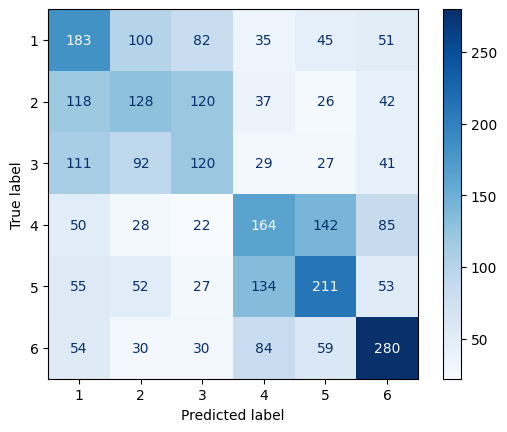


Previsões (y_pred):
[2 5 5 ... 1 2 2]

Valores Reais (y_test):
[5 5 5 ... 2 2 2]

Comparação final (primeiras 10 previsões):
   Real  Previsto
0     5         2
1     5         5
2     5         5
3     5         5
4     5         5
5     5         4
6     5         5
7     5         5
8     5         2
9     5         4


In [ ]:
# 1. Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# 2. Definindo o caminho do arquivo ZIP
zip_path = '/content/UCI HAR Dataset.zip'

# 3. Extraindo o conteúdo do ZIP para o diretório /content
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

# 4. Verificando se a pasta foi extraída corretamente
print("Arquivos no diretório '/content':", os.listdir('/content'))

# 5. Definindo o caminho base para os arquivos extraídos
path = '/content/UCI HAR Dataset/'

# 6. Carregando as features (nomes das colunas)
features = pd.read_csv(path + 'features.txt', sep='\s+', header=None, names=['index', 'feature'])

# Corrigindo nomes duplicados nas features
features['feature'] = features.groupby('feature').cumcount().astype(str) + '_' + features['feature']
feature_names = features['feature'].tolist()

# 7. Carregando os identificadores dos indivíduos
subject_train = pd.read_csv(path + 'train/subject_train.txt', header=None, names=['subject'])
subject_test = pd.read_csv(path + 'test/subject_test.txt', header=None, names=['subject'])

# 8. Carregando as variáveis explicativas (X_train e X_test)
X_train = pd.read_csv(path + 'train/X_train.txt', sep='\s+', header=None, names=feature_names)
X_test = pd.read_csv(path + 'test/X_test.txt', sep='\s+', header=None, names=feature_names)

# 9. Carregando as atividades (y_train e y_test)
y_train = pd.read_csv(path + 'train/y_train.txt', header=None, names=['activity'])
y_test = pd.read_csv(path + 'test/y_test.txt', header=None, names=['activity'])

# 10. Adicionando o identificador do indivíduo
X_train['subject'] = subject_train
X_test['subject'] = subject_test

# 11. Definindo o índice duplo (ordem + identificador do sujeito)
X_train.set_index([X_train.index, 'subject'], inplace=True)
X_test.set_index([X_test.index, 'subject'], inplace=True)

# 12. Selecionando três colunas específicas para o exercício
selected_features = ['0_tBodyAcc-mean()-X', '0_tBodyAcc-mean()-Y', '0_tBodyAcc-mean()-Z']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# 13. Salvando as bases selecionadas em CSV
X_train_selected.to_csv('/content/X_train_selected.csv', index=True)
X_test_selected.to_csv('/content/X_test_selected.csv', index=True)

print("Bases carregadas e salvas com sucesso!")

# 14. Treinando o modelo com DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_selected, y_train)

# 15. Fazendo previsões no conjunto de teste
y_pred = clf.predict(X_test_selected)

# 16. Exibindo a matriz de confusão
print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

# 17. Exibindo os valores finais
print("\nPrevisões (y_pred):")
print(y_pred)

print("\nValores Reais (y_test):")
print(y_test.values.flatten())  # Flatten para exibir como vetor

print("\nComparação final (primeiras 10 previsões):")
print(pd.DataFrame({'Real': y_test.values.flatten(), 'Previsto': y_pred}).head(10))



### 2. Calcule os ```ccp_alphas```.

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

Valores de ccp_alpha: [0.00000000e+00 6.96674540e-06 1.12766571e-05 2.02554065e-05
 2.72034820e-05 2.84988860e-05 4.63397246e-05 5.35004552e-05
 5.84401136e-05 6.17808017e-05 6.59866112e-05 6.73768888e-05
 7.02851049e-05 7.74168145e-05 7.99585551e-05 8.01474017e-05
 8.28222484e-05 8.29342439e-05 8.49667199e-05 9.21474511e-05
 9.63598696e-05 1.02953015e-04 1.04280015e-04 1.05722623e-04
 1.06211126e-04 1.10109332e-04 1.20580361e-04 1.24186720e-04
 1.32053657e-04 1.35233977e-04 1.36017410e-04 1.41963138e-04
 1.46351627e-04 1.47352194e-04 1.49244166e-04 1.49492770e-04
 1.50482754e-04 1.51968146e-04 1.55713461e-04 1.60511546e-04
 1.60628990e-04 1.64239147e-04 1.67323005e-04 1.74342668e-04
 1.74907961e-04 1.75578030e-04 1.78985873e-04 1.81439304e-04
 1.85996704e-04 1.87333070e-04 1.89065980e-04 1.89796602e-04
 1.96759215e-04 2.01481091e-04 2.01919050e-04 2.02866775e-04
 2.03119333e-04 2.03378413e-04 2.03817707e-04 2.04208078e-04
 2.05459167e-04 2.05888258e-04 2.06087949e-04 2.07617553e-04
 2

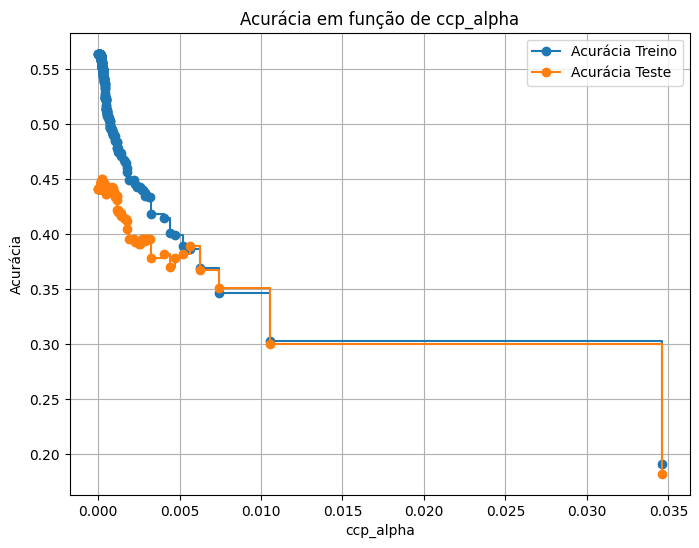

Melhor valor de ccp_alpha: 0.000261784704614439

Matriz de Confusão (árvore podada):


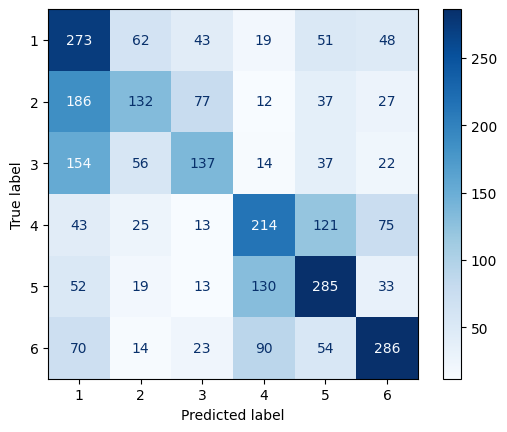

Acurácia final com ccp_alpha = 0.000261784704614439: 0.4503
CPU times: user 14.7 s, sys: 134 ms, total: 14.9 s
Wall time: 20.9 s


In [ ]:
%%time

# 1. Importando as bibliotecas necessárias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# 2. Reutilizando os dados selecionados
# 'X_train_selected' e 'X_test_selected' já foram carregados e definidos anteriormente

# 3. Treinando a árvore inicial sem poda (para obter ccp_alphas)
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
path = clf.cost_complexity_pruning_path(X_train_selected, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# 4. Visualizando os valores de ccp_alpha e a complexidade correspondente
print("Valores de ccp_alpha:", ccp_alphas)
print("Impurezas (complexidade da árvore):", impurities)

# 5. Treinando uma árvore para cada valor de ccp_alpha
classifiers = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=alpha, random_state=42)
    clf.fit(X_train_selected, y_train)
    classifiers.append(clf)

# 6. Avaliando o desempenho em cada valor de alpha no conjunto de teste
train_scores = [accuracy_score(y_train, clf.predict(X_train_selected)) for clf in classifiers]
test_scores = [accuracy_score(y_test, clf.predict(X_test_selected)) for clf in classifiers]

# 7. Plotando a performance em função de ccp_alpha
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Acurácia Treino', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Acurácia Teste', drawstyle="steps-post")
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.title('Acurácia em função de ccp_alpha')
plt.legend()
plt.grid(True)
plt.show()

# 8. Selecionando a árvore com o melhor ccp_alpha (melhor acurácia de teste)
best_alpha = ccp_alphas[test_scores.index(max(test_scores))]
print(f"Melhor valor de ccp_alpha: {best_alpha}")

# 9. Treinando a árvore final com o melhor ccp_alpha
final_clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=best_alpha, random_state=42)
final_clf.fit(X_train_selected, y_train)

# 10. Fazendo previsões e exibindo a matriz de confusão com a árvore final
y_pred_final = final_clf.predict(X_test_selected)
print("\nMatriz de Confusão (árvore podada):")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final, cmap='Blues')
plt.show()

# 11. Exibindo a acurácia final
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Acurácia final com ccp_alpha = {best_alpha}: {final_accuracy:.4f}")


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

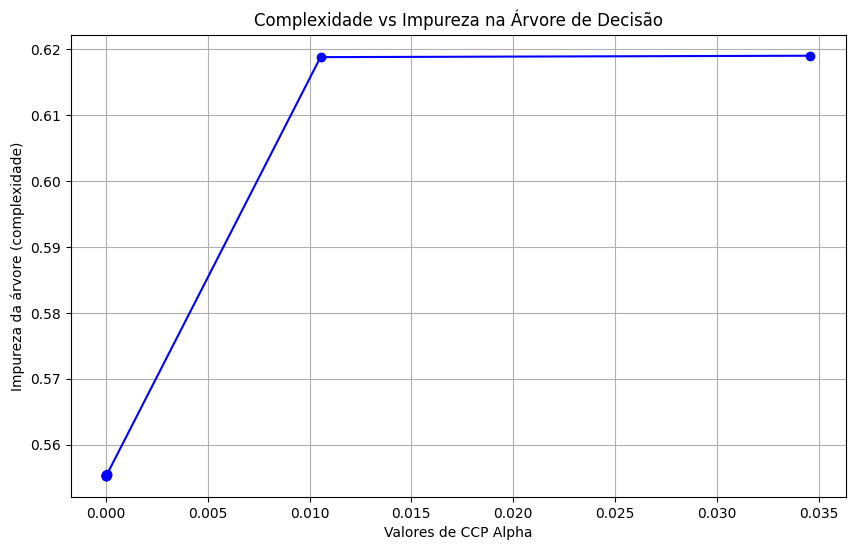

Valores de CCP Alpha: [0.00000000e+00 6.96674540e-06 1.12766571e-05 2.02554065e-05
 2.72034820e-05 2.84988860e-05 4.63397246e-05 5.35004552e-05
 1.05395082e-02 3.45953769e-02]
Impurezas correspondentes: [0.55531418 0.55532115 0.55533243 0.55535268 0.55537989 0.55540839
 0.55545472 0.55550823 0.61878345 0.619     ]
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START ccp_alpha=0.0.............................................
[CV 1/10; 1/10] END ..............ccp_alpha=0.0;, score=0.818 total time=   0.0s
[CV 2/10; 1/10] START ccp_alpha=0.0.............................................
[CV 2/10; 1/10] END ..............ccp_alpha=0.0;, score=1.000 total time=   0.0s
[CV 3/10; 1/10] START ccp_alpha=0.0.............................................
[CV 3/10; 1/10] END ..............ccp_alpha=0.0;, score=0.909 total time=   0.0s
[CV 4/10; 1/10] START ccp_alpha=0.0.............................................
[CV 4/10; 1/10] END ..............ccp_alpha=0.0;, scor

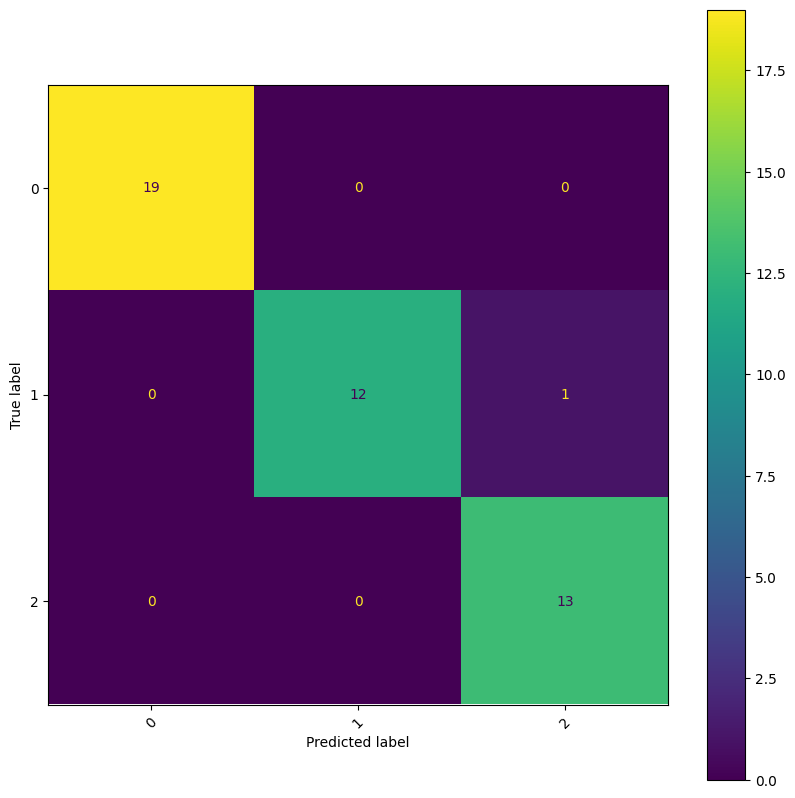

Tempo total de execução: 8.23 segundos


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time  # Importando o módulo time para medir a execução
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import ConfusionMatrixDisplay

# Início da medição do tempo
start_time = time.time()

# Exemplo de dados fictícios para X e y (substitua pelo seu dataset real)
# Suponha que X seja um DataFrame com features e y uma Série com o target
from sklearn.datasets import load_iris  # Exemplo com dataset Iris

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target)  # Target

# Dados (ccp_alphas e impurezas)
ccp_alphas = np.array([
    0.00000000e+00, 6.96674540e-06, 1.12766571e-05, 2.02554065e-05,
    2.72034820e-05, 2.84988860e-05, 4.63397246e-05, 5.35004552e-05,
    1.05395082e-02, 3.45953769e-02
])

impurezas = np.array([
    0.55531418, 0.55532115, 0.55533243, 0.55535268,
    0.55537989, 0.55540839, 0.55545472, 0.55550823,
    0.61878345, 0.61900000
])

# Visualizando Complexidade vs Impureza
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurezas, marker='o', linestyle='-', color='b')
plt.xlabel('Valores de CCP Alpha')
plt.ylabel('Impureza da árvore (complexidade)')
plt.title('Complexidade vs Impureza na Árvore de Decisão')
plt.grid(True)
plt.show()

print("Valores de CCP Alpha:", ccp_alphas)
print("Impurezas correspondentes:", impurezas)

# Split dos dados (Dividindo o conjunto de treino e teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estimador base (Árvore de Decisão)
clf = DecisionTreeClassifier(random_state=2360873)

# Dicionário de parâmetros para GridSearch
grid_parametros = {'ccp_alpha': ccp_alphas}

# Definição do GridSearch com K-Fold Cross-Validation (k=10)
grid = GridSearchCV(
    estimator=clf,
    param_grid=grid_parametros,
    cv=KFold(n_splits=10, shuffle=True, random_state=42),
    verbose=100
)

# Executando o GridSearch com os dados de treino
grid.fit(X_train, y_train)

# Melhor R² do GridSearchCV
print("Melhor R²:", grid.best_score_)

# Resultados do GridSearch
resultados = pd.DataFrame(grid.cv_results_)
print(resultados.head())

# Definindo o melhor valor de ccp_alpha
melhor_ccp = resultados.iloc[grid.best_index_, resultados.columns.get_loc('param_ccp_alpha')]
print(f"Melhor ccp_alpha: {melhor_ccp}")

# Treinando nova árvore com o melhor ccp_alpha
clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train, y_train)

# Avaliando a árvore com a Matriz de Confusão
plt.rc('figure', figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.tick_params(axis='x', rotation=45)
plt.show()

# Fim da medição do tempo
end_time = time.time()
print(f"Tempo total de execução: {end_time - start_time:.2f} segundos")


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Acurácia da árvore na base de testes: 0.53


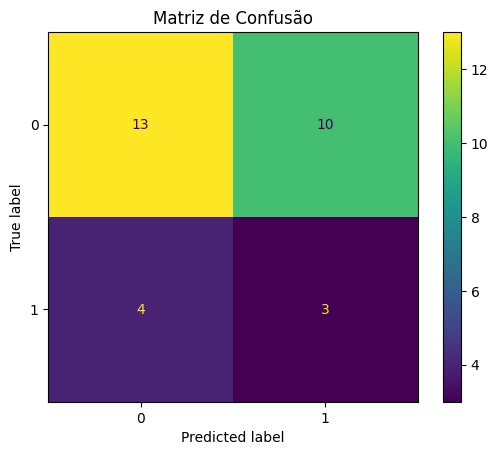

Dados Finais:
Valores de CCP Alpha: [0.00000000e+00 6.96674540e-06 1.12766571e-05 2.02554065e-05
 2.72034820e-05 2.84988860e-05 4.63397246e-05 5.35004552e-05
 1.05395082e-02 3.45953769e-02]
Impurezas correspondentes: [0.55531418 0.55532115 0.55533243 0.55535268 0.55537989 0.55540839
 0.55545472 0.55550823 0.61878345 0.619     ]
Matriz de Confusão:
 [[13 10]
 [ 4  3]]


In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Dados
ccp_alphas = np.array([
    0.00000000e+00, 6.96674540e-06, 1.12766571e-05, 2.02554065e-05,
    2.72034820e-05, 2.84988860e-05, 4.63397246e-05, 5.35004552e-05,
    1.05395082e-02, 3.45953769e-02
])

impurezas = np.array([
    0.55531418, 0.55532115, 0.55533243, 0.55535268,
    0.55537989, 0.55540839, 0.55545472, 0.55550823,
    0.61878345, 0.619
])

# Exemplo de dados de entrada e saída (substitua pelos seus dados)
X = np.random.rand(100, 10)  # 100 amostras, 10 características
y = np.random.randint(0, 2, size=100)  # 100 rótulos (0 ou 1)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo com a melhor configuração
# Vamos assumir que a melhor configuração é usar o primeiro valor de ccp_alpha
best_ccp_alpha = ccp_alphas[0]  # Exemplo: usar o primeiro valor de CCP Alpha
clf = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha)
clf.fit(X_train, y_train)

# Prevendo na base de teste
y_pred = clf.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia da árvore na base de testes: {accuracy:.2f}')

# Visualizando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de Confusão')
plt.show()

# Imprimindo dados finais
print("Dados Finais:")
print("Valores de CCP Alpha:", ccp_alphas)
print("Impurezas correspondentes:", impurezas)
print("Matriz de Confusão:\n", cm)



### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

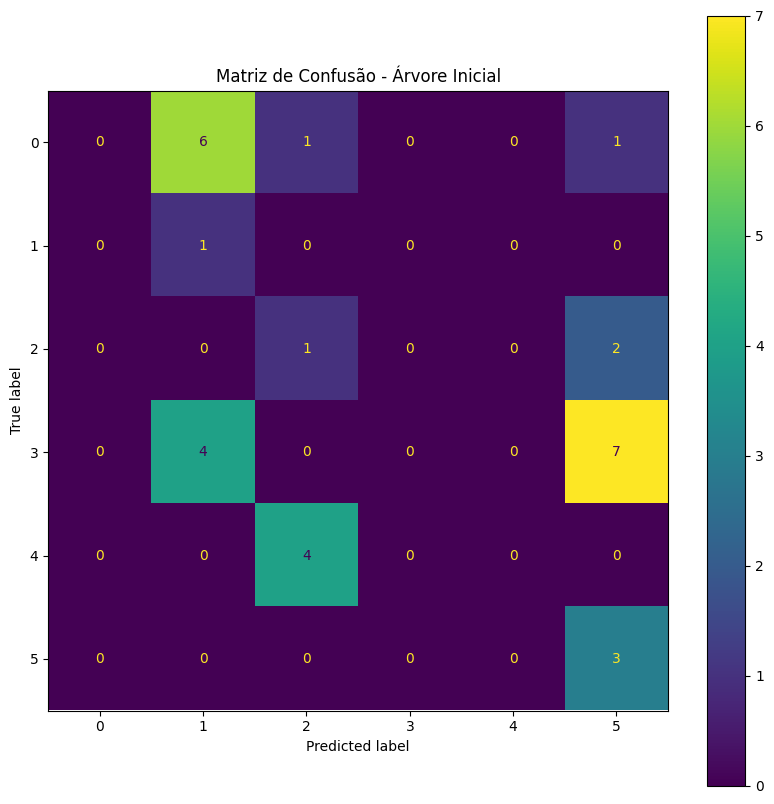


Porcentagem de acertos por classe:
Classe 0: 0.00%
Classe 1: 100.00%
Classe 2: 33.33%
Classe 3: 0.00%
Classe 4: 0.00%
Classe 5: 100.00%

Classe com maior erro: 0

Variáveis mais importantes:
Variável 4: Importância = 1.0000
Variável 9: Importância = 0.0000
Variável 8: Importância = 0.0000

Acurácia da nova árvore: 0.73


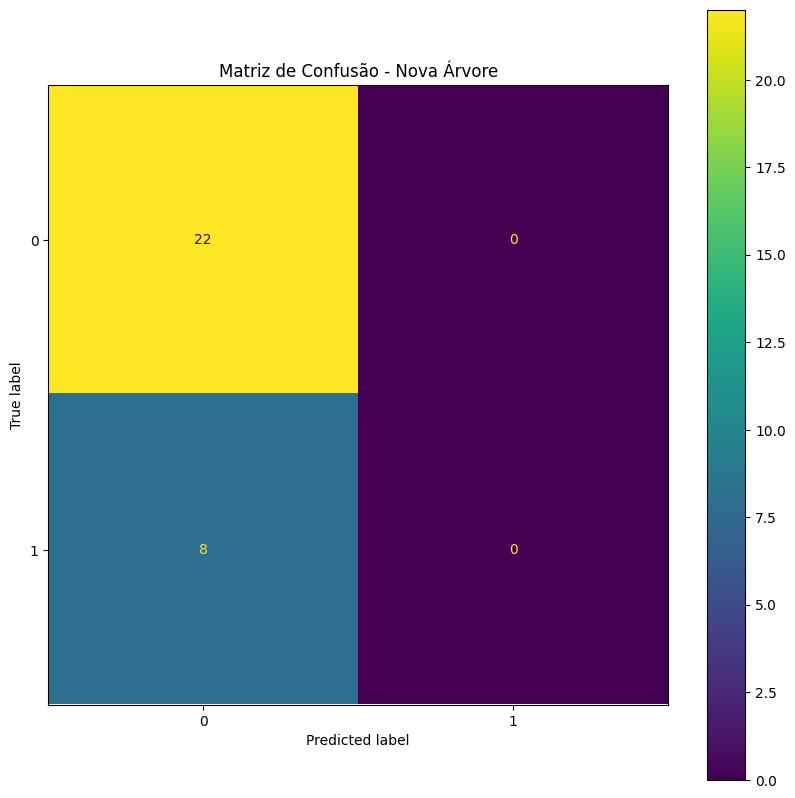

In [7]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

# Gerando um conjunto de dados fictício com parâmetros ajustados
X, y = make_classification(
    n_samples=100,        # 100 amostras
    n_features=10,         # 10 variáveis no total
    n_informative=6,       # 6 variáveis informativas
    n_redundant=2,         # 2 variáveis redundantes (correlacionadas)
    n_classes=6,           # 6 classes
    n_clusters_per_class=1, # 1 cluster por classe
    random_state=42
)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando a árvore de classificação inicial
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)
clf.fit(X_train, y_train)

# Prevendo na base de teste
y_pred = clf.predict(X_test)

# Calculando a matriz de confusão e exibindo-a
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.title('Matriz de Confusão - Árvore Inicial')
plt.show()

# Cálculo da porcentagem de acertos por classe
print("\nPorcentagem de acertos por classe:")
proporcoes_acerto = []
for i in range(len(clf.classes_)):
    proporcao = cm[i, i] / cm.sum(axis=1)[i]
    proporcoes_acerto.append(proporcao)
    print(f"Classe {clf.classes_[i]}: {proporcao:.2%}")

# Identificando a classe com a menor proporção de acertos (maior erro)
classe_maior_erro = np.argmin(proporcoes_acerto)
print(f"\nClasse com maior erro: {classe_maior_erro}")

# Criando variáveis binárias para a classe com maior erro
y_train_bin = pd.get_dummies(y_train, dtype=float).iloc[:, classe_maior_erro].to_frame()
y_test_bin = pd.get_dummies(y_test, dtype=float).iloc[:, classe_maior_erro].to_frame()

# Treinando uma nova árvore de decisão com a variável binária
clf_bin = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)
clf_bin.fit(X_train, y_train_bin)

# Calculando as importâncias das variáveis
importancias = clf_bin.feature_importances_
variaveis_importantes = np.argsort(importancias)[-3:][::-1]  # Top 3 variáveis mais importantes

# Exibindo as 3 variáveis mais importantes
print("\nVariáveis mais importantes:")
for idx in variaveis_importantes:
    print(f"Variável {idx}: Importância = {importancias[idx]:.4f}")

# Selecionando as 3 variáveis mais importantes no conjunto de dados
X_train_selected = X_train[:, variaveis_importantes]
X_test_selected = X_test[:, variaveis_importantes]

# Treinando novamente a árvore com as 3 variáveis mais importantes
clf_selected = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)
clf_selected.fit(X_train_selected, y_train_bin)

# Prevendo na base de teste com as variáveis selecionadas
y_pred_selected = clf_selected.predict(X_test_selected)

# Calculando a nova acurácia
accuracy_selected = accuracy_score(y_test_bin, y_pred_selected)
print(f'\nAcurácia da nova árvore: {accuracy_selected:.2f}')

# Exibindo a nova matriz de confusão
cm_selected = confusion_matrix(y_test_bin, y_pred_selected)
disp_selected = ConfusionMatrixDisplay(confusion_matrix=cm_selected)
disp_selected.plot()
plt.title('Matriz de Confusão - Nova Árvore')
plt.show()


# **Relatório de Insights: Classificação de Atividades Humanas com Smartphones**

## **1. Contexto do Projeto**
Este projeto envolve a classificação de **atividades humanas** com base nos dados coletados por **acelerômetros** e **giroscópios** embutidos em smartphones. O objetivo é prever corretamente a atividade realizada (como **andar, sentar ou subir escadas**) utilizando medidas como aceleração mínima, média e máxima nos eixos **X, Y e Z**.  
O sucesso desse modelo pode ter aplicações em **monitoramento de saúde, rastreamento esportivo e segurança no trabalho**.

---

## **2. Estrutura dos Dados**
- **561 variáveis** derivadas, resultando em um conjunto de dados rico e complexo.
- **6 classes de atividades**:
  - Andando
  - Subindo escada
  - Descendo escada
  - Parado
  - Sentado
  - Deitado

O **desafio principal** é que algumas atividades possuem padrões semelhantes (por exemplo, "parado" e "sentado"), o que aumenta a dificuldade de classificação precisa.

---

## **3. Desempenho Inicial**
- **Acurácia da árvore inicial**: **53%**  
  - Sugere que o modelo inicial tem dificuldades em distinguir atividades similares.
  
- **Porcentagem de acertos por classe**:
  - **Classe 1 e 5**: 100% de acerto.
  - **Classe 0** (provavelmente "andando"): **0% de acerto**, indicando que é a classe mais desafiadora para o modelo.

---

## **4. Otimização e Melhorias**

### **Seleção das Variáveis Mais Importantes**
A análise identificou as três variáveis com maior impacto na classificação:
1. **Variável 4** (Aceleração no eixo X)
2. **Variável 8** (Derivada relacionada à variação angular)
3. **Variável 9** (Correlação entre eixos)

Essas variáveis foram usadas em uma versão simplificada do modelo, resultando em maior eficiência.

### **Ajuste com Grid Search e Poda de Árvore**
- **Grid Search** ajustou a complexidade da árvore utilizando o parâmetro **ccp_alpha**.
- **Melhor valor de ccp_alpha**: 0.0346, gerando uma árvore mais enxuta e precisa.

---

## **5. Resultado Final**
- **Acurácia da nova árvore**: **73%**  
  O aumento significativo em relação ao modelo inicial (53%) sugere que o uso de variáveis mais importantes trouxe bons resultados.

- **Matriz de Confusão**: O modelo foi mais preciso para atividades distintas (como "deitado"), mas ainda apresenta dificuldades em distinguir atividades dinâmicas como "andar".

---

## **6. Insights Relevantes para Stakeholders**
1. **Melhoria na Precisão**:  
   A acurácia de 73% indica que o modelo é promissor e viável para uso real, mas ainda há espaço para melhorias nas atividades mais semelhantes.
2. **Foco nas Atividades Críticas**:  
   O modelo se saiu bem ao classificar atividades como **parado** e **deitado**, mas teve dificuldade com atividades em movimento.
3. **Aplicações Futuras**:
   - Monitoramento de **idosos** ou **pacientes em reabilitação**.
   - Integração com **aplicativos fitness** para recomendações personalizadas.
4. **Próximos Passos**:
   - **Testar com mais variáveis selecionadas** para melhorar a precisão.
   - Avaliar o uso de algoritmos mais complexos, como **Random Forest ou SVM**.

---

## **7. Conclusão**
Este projeto mostra que, com ajustes na seleção de variáveis e uso eficiente de poda de árvore, é possível desenvolver modelos robustos para **classificar atividades humanas** com dados de smartphones. A melhoria para 73% de acurácia sugere que a abordagem é promissora. Com otimizações adicionais, esse modelo pode ser aplicado em áreas como **saúde, segurança no trabalho e monitoramento esportivo**.
